<a href="https://colab.research.google.com/github/AllanRocha28/template_portfolio/blob/master/An%C3%A1lisedosdadosdoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic**

O Titanic foi um navio britânico que teve sua construção iniciada em 1909 e lançado ao mar em 1911. Foi projetado para ser o maior navio em termos de luxo e segurança em relação aos navios de sua época; chegou a receber o título de "inafundável".
Seu trajeto iniciou em *Southampton*, Reino Unido, em 1912 passando por *Cherbourg-Octeville*, França, e *Queenstown*, Irlanda, com destino a Nova Iorque.

No dia 14 de abril, às 23h40min, o Titanic colidiu com um *iceberg*, afundando na madrugada do dia 15. O seu naufrágio mostrou tanto o despreparo no procedimento de evacuação dos passageiros e da tripulação, além de vários pontos fracos no projeto do navio.

O Titanic contava com 892 tripulantes e 2.435 passageiros no momento da colisão com o *iceberg*.

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/af/Titanic-computergraphic2011.png)



### **1º Definição do Problema**

##### Durante o momento da evacuação do navio, diferentes fatores podem ter contribuído para a sobrevivência de alguns passageiros, como: dar a preferência ao desembarque de mulheres e crianças primeiro e como outro requisito, a classe social.


#### **Objetivos**

##### Avaliar as variáveis que pesaram na sobrevivência de determinados indíviduos;
##### Analisar a probabilidade de uma pessoa fictícia ter sobrevivido inserindo novos valores a respeito desse indivíduo.

### **2º Obtenção dos dados**

Os dados estão disponíveis no [Kaggle](https://www.kaggle.com/c/titanic) e foram baixados no formato *.csv*.
Os arquivos foram divididos em duas partes:

*   Dataset de treino (train.csv):
  *   Com dados dos passageiros como sexo, idade, preço da passagem e outros dados, incluindo se sobreviveram ou não.
*   Dataset de Teste (test.csv):
  *   Dados que podem ser inseridos sobre um indivíduo, *input*, e sem informação se o nosso indivíduo sobreviveu ou não, de forma a inferir se ele teria sobrevivido ou não a partir das demais características.

### **3º Exploração dos dados**

In [ ]:
# Importação dos pacotes para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Permitir visualizar todas as colunas
pd.options.display.max_columns = None

In [ ]:
# Importação dos arquivos de treino e de teste

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

**Quantas variáveis (colunas) e quantas entradas (linhas) tem nosso arquivo de treino?**

In [ ]:
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


Temos 12 variáveis (colunas) e 891 entradas de dados (linhas).
Devemos analisar quais são e de que tipo são essas variáveis para poder entender como podem ser analisadas.

#### **Descrição das variáveis**


*   **PassengerId:** Número de identificação do passageiro
*   **Survived:** Se sobreviveu
  * 0 = Não
  * 1 = Sim
*   **Pclass:** Classe do bilhete do passageiro
  * 1 = 1º Classe
  * 2 = 2º Classe
  * 3 = 3º Classe
*   **Name:** Nome do passageiro
*   **Sex:** Sexo do passageiro
*   **Age:** Idade do passageiro
*   **SibSp:** Quantidade de cônjugues e irmãos no navio
*   **Parch:** Quantidade de pais e filhos a bordo
*   **Ticket:** Número da passagem
*   **Fare:** Preço da passagem
*   **Cabin:** Número da cabine do passageiro
*   **Embarked:** Em qual porto o passageiro embarcou
  * S = Southampton, Reino Unido
  * C = Cherbourg, França
  * Q = Queenstown, Irlanda


In [ ]:
# tipos das variáveis
display(train.dtypes)

# Apresentando os 5 primeiros valores e os 5 últimos de cada variável.
display(train.head())
display(train.tail())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Podemos observar que temos 7 variáveis númericas, 5 do tipo discreto e 2 contínuo. Também temos 5 variáveis do tipo categórica.

Esse estudo se trata de um Aprendizado Supervisionado portanto, será utilizada como nossa variável alvo a sobrevivência ou não do indivíduo (*Survived*).

### **Análise dos dados**

**Qual é a porcentagem dos valores faltantes em cada variável?**

In [ ]:
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

Dependendo da quantidade dos valores faltantes, pode ser aplicado a exclusão ou substituição dos valores ausentes pela média, mediana ou valor mais frequente.
Como será feito mais adiante.

As variáveis **Cabin** e **Age** são as que mais possuem valores ausentes, 77% e 19.8%, respectivamente.
Depois dessas, os valores nulos ou ausentes caem para 0,2% para o **PassengerId** e o restante das variáveis não possuem valores faltantes. 

**Como estão distribuídos os valores estatísticos das variáveis numéricas?** 

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nem todas as variáveis devem ser analizadas estatisticamente, pois sua análise não traz nenhum significado, como a variável **PassengerId**. Outras, podem não ser de interesse analisar.

Algumas dessas variáveis acima trazem informações relevante para a análise, como: **Pclass, Age, SibSp, Parch e Fare**.

**Distribuição dos valores de algumas das variáveis.**

In [ ]:
# Porcentagem da distribuição entre os sexos
display(train.Sex.value_counts() / train.shape [0])
print("\n")

# Porcentagem da distribuição entre as classes
display(train.Pclass.value_counts() / train.shape [0])
print("\n")

# Porcentagem da distribuição das pessoas que embarcaram em diferentes portos
display(train.Embarked.value_counts() / train.shape [0])

male      0.647587
female    0.352413
Name: Sex, dtype: float64

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

**Quais grupos de pessoas tiveram maiores chances de sobreviver?**

In [ ]:
display(train[['Sex', 'Survived']].groupby(['Sex']).mean())

,Survived
Sex,
female,0.742038
male,0.188908


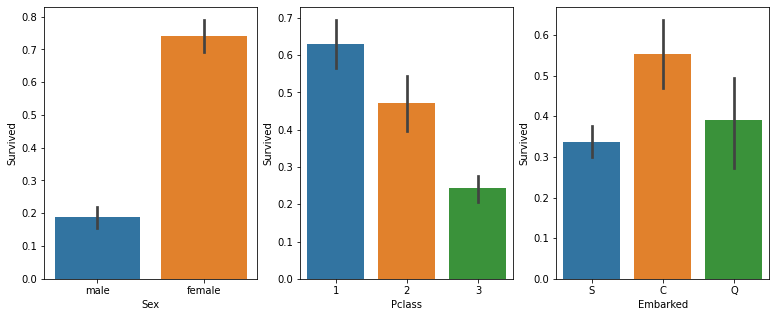

In [ ]:
# Plotando gráficos de Sex, Pclass e Embarked por Survived
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(13,5))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

A partir da tabela e do 1º gráfico (*Sex vs Survived*) é possível observar que o fator gênero (masculino e feminino) influenciou na sobrevivência das mulheres.

Outro fator que contribuiu na sobrevivência de determinados indivíduos pode ser observado no 2º gráfico, a classe social.

Por fim, o 3º gráfico mostra que o local de embarque pode ter contribuído para a sobrevivência do passageiro.
Uma possibilidade, seria essas pessoas pertencerem, majoritariamente, a 1ª ou 2ª classe, o que iría correlacionar com o 2º gráfico (*Pclass vs Survived*).

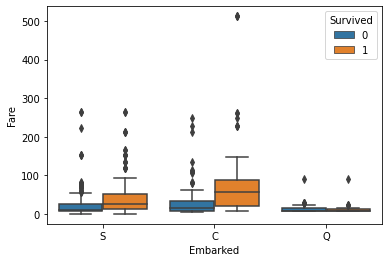

In [ ]:
survived = sns.boxplot( x=train["Embarked"], y=train["Fare"], hue=train["Survived"],
                  data=train);

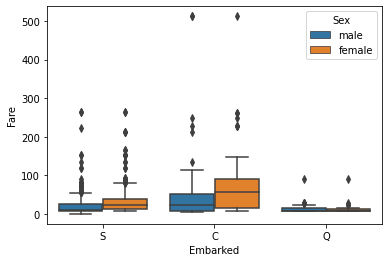

In [ ]:
survived2 = sns.boxplot( x=train["Embarked"], y=train["Fare"], hue=train["Sex"],
                  data=train);

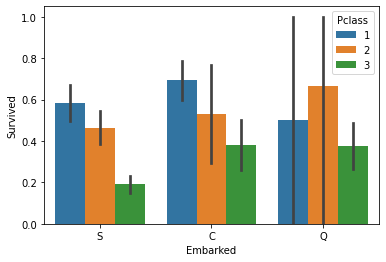

In [ ]:
survived3 = sns.barplot(x='Embarked', y='Survived', hue=train["Pclass"], data=train);

##### No 1º boxplot acima, nota-se que as pessoas que embarcaram no porto da França pagaram mais do que as que embarcaram no Reino Unido e na Irlanda e que a variável *Fare* pesou para a sobrevivência; é possível observar que o valor da passagem para as mulheres foi maior que para os homens, no 2º boxplot.

##### O gráfico survived3 mostra que a chance de uma pessoa de determinada classe social ter sobrevivido, é maior quando esta embarcou na França do que no Reino Unido. Isso se deve, possivelmente, ao fato destes passageiros terem pago um valor maior pela passagem.

##### Foi desconsiderado a análise de quem embarcou na Irlanda, pois os valores são bastantes fluentes.

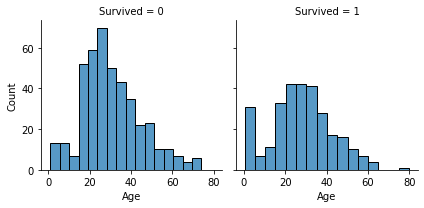

In [ ]:
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.histplot, 'Age')

##### O gráfico age_survived apresenta um ponto interessante em que para o caso dos sobreviventes, *Survived*=1, há um pico para a faixa etária de 0-5 anos, o que demonstra que estes foram também priorizados no momento da evacuação.
##### O restante da curva pouco difere dos que não sobreviveram. 

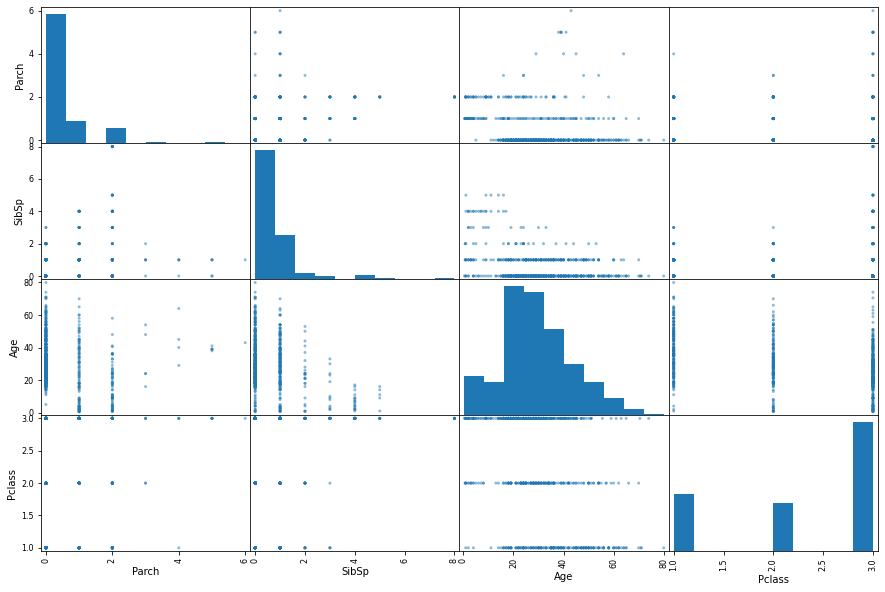

In [ ]:
columns = ['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15,10));

No gráfico acima, *scartter matrix*, alguns pontos podem ser destacados. As pessoas da 1º classe apresentavam idades maiores que as pessoas da 3º classe.

Os gráficos das varíaveis *SibSp* e *Parch* pela idade parecem ter alguma semelhança, mostrando uma possível relação.

O gráfico *heatmap* apresenta a correlação positiva ou negativa de duas variáveis.

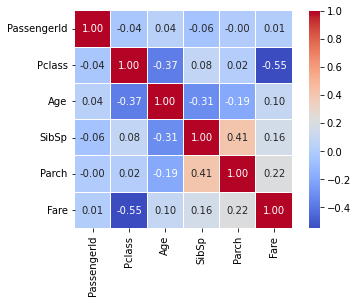

In [ ]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

A correlação entre a quantidade de pais ou filhos (*Parch*) com  a quantidade de cônjugues ou irmãos (*SibSp*) a bordo do navio apresentou uma correlação de **41%**.

Uma forte correlação negativa **(55%)** é apresentada entre as variáveis *Pclass* e *Fare* o que demonstra, que as pessoas da 1ª classe pagaram mais pelo preço da passagem.
Outras duas interessantes correlações negativas e relacionadas a variável **classes** são as de **sobrevivência** (*Survived*) e **idade** (*Age*) que apresentaram valores de **34%** e **37%**, respectivamente; esses valores demostram que as pessoas da 1ª classe tiveram uma chance considerável de sobreviver e que são mais velhas que as pessoas da 2ª e 3ª classe.

### **Conclusão do 1º objetivo**

1.   Das variáveis analisadas, a que apresenta a maior quantidades de valores ausentes ou nulos foi da *Age*, 20%, mas que não dificultou na análise do desafio do Titanic;

2.   Havia um número maior de homens a bordo, 65%, a 3ª classe era maior que a 1ª e 2ª classe juntas, 55%, e o porto que houve o maior número de embarque foi no Reino Unido, 72.3%;

3.   Os fatores classe social e sexo foram cruciais para a sobrevivência e no caso das crianças a idade também contribuiu.

### **2º Parte do artigo**

#### 2º objetivo:
  - Analisar a probabilidade de uma pessoa fictícia ter sobrevivido, inserindo novos valores a respeito desse indivíduo.

Reunindo os datasets de treino e teste, o que irá facilitar o trabalho.

In [ ]:
# salvar os números das linhas para uso posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar o PassengerId que será usado na submissao para o Kaggle
passengerId = test['PassengerId']

# cópia do arquivo train para target e excluíndo a coluna Survived de train
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenação de treino e teste em um DataFrame (df_merged)
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


In [ ]:
# Extrair variáveis que não seram utilizadas
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
# Variáveis que estão com valores nulos
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Preenchendo os valores ausentes com média, mediana ou valor mais frequente, a depender da variável e da melhor escolha para o preenchimento.

In [ ]:
# idade preenchendo com média
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# valor da passagem com mediana
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# e a variável embarked com o valor mais frequente
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

##### Será feita uma análise que exige que todas as variáveis sejam numéricas, por isso as variáveis categóricas, *Sex* e *Embarked*, receberam um tratamento para se tornarem numéricas.

##### Para *Sex* escolhemos os valores 0 e 1 para *male* e *female*, respectivamente.
##### Para Embarked usamos a idéia de dummy que preenche o valor correspondente ao categórico com 1 e os outros assume valor 0.

In [ ]:
# Sex: male=0 e female=1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# Embaked uso de dummies
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


Desfazendo a concatenação e recuperando os arquivos *train* e *test*.

In [ ]:
# desconcatenação
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

Construção dos modelos de:


*   Regressão Logística 
*   Árvore de Decisão

In [ ]:
# importação das bibliotecas para o modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# criação do modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear');
lr_model.fit(train, target)

# Verificação da acurácia do nosso modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do nosso modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do nosso modelo de Regressão Logística: 80.13


A acurácia é bastante elevada.

Nesta etapa será observado o dataset de treino e será comparado o desempenho.

In [ ]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# arquivo para submeter ao kagggle
submission.to_csv('./submission_lr.csv', index=False)

In [ ]:
# criação do modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificação da acurácia
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


O valor da acurácia pelo modelo de árvore de decisão foi um pouco maior e será submetido ao kaggle para comparação.

In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# arquivo para submeter ao kagggle
submission.to_csv('./submission_tree.csv', index=False)

In [ ]:
# declaração dos valores das variáeis para diferentes pessoas fictícias
allan = np.array([2, 0, 29, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
thamiris = np.array([2, 1, 29, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
jorge = np.array([3, 0, 5, 0, 1, 5.2, 0, 0, 0, 1]).reshape((1, -1))
paulo = np.array([1, 0, 49, 1, 1, 450, 0, 0, 0, 1]).reshape((1, -1))
pedro = np.array([2, 0, 28, 1, 0, 32.2, 0, 0, 0, 1]).reshape((1, -1))
mariana = np.array([3, 1, 25, 1, 0, 32.2, 0, 0, 0, 1]).reshape((1, -1));


# verificar se nós teríamos sobrevivido
print("Allan:\t{}".format(tree_model.predict(allan)[0]));
print("Thamiris:\t{}".format(tree_model.predict(thamiris)[0]));
print("Jorge:\t{}".format(tree_model.predict(jorge)[0]));
print("Paulo:\t{}".format(tree_model.predict(paulo)[0]))
print("Pedro:\t{}".format(tree_model.predict(pedro)[0]))
print("Mariana:\t{}".format(tree_model.predict(mariana)[0]));

Allan:	0
Thamiris:	1
Jorge:	1
Paulo:	0
Pedro:	0
Mariana:	0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

### **Conclusão do 2º objetivo**

Como pode ser observado no modelo para pessoas fictícias:

  - Mulheres teriam sobrevivido com facilidade se fossem até da segunda classe, mas morrido se fossem da terceira;
  - Crianças teriam uma chance maior de sobreviver, mesmo sendo da terceira classe;
  - Enquanto os homens, mesmo sendo da primeira classe, e tendo pago um valor alto pela passagem, teriam uma chance alta de morrer.